In [516]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as py
import seaborn as sns
%matplotlib inline

#  read in original data
## preliminary data cleaning

In [517]:
data_all=pd.read_excel('all_together.xlsx')

In [518]:
data_all.shape

(25381, 33)

In [504]:
data_all.columns=data.columns.str.replace('-','_')

In [532]:
# change column name to make them consistent
data_all.columns

Index(['order', 'settlement_date', 'file_id', 'transaction_serie_number',
       'class', 'insurance_id', 'gender', 'province', 'insuree_type',
       'civil_servant', 'admission_date', 'discharge_date', 'days',
       'total_amount', 'cash_payment', 'personal_account_payment', 'upload',
       'settlement_method', 'insurance_type', 'status', 'emergency',
       'red_label', 'department', 'admission_type', 'discharge_type',
       'diagnosis', 'surgery', 'insurance_payment', 'self_payment', 'self1',
       'self2', 'deductible', 'payment_date'],
      dtype='object')

In [531]:
data_all.columns=data_all.columns.str.replace('-','_')

In [533]:
# delete inaccurate records
data_all=data_all[data_all.total_amount>0]

In [284]:
o_data=pd.read_excel('others.xls')

In [526]:
o_data.columns=o_data.columns.str.replace(' ','_')

In [527]:
o_data.columns

Index(['order', 'settlement_date', 'file_id', 'transaction_serie_number',
       'class', 'insurance_id', 'gender', 'province', 'insuree_type',
       'civil_servant', 'admission_date', 'discharge_date', 'total_amount',
       'cash_payment', 'personal_account_payment', 'upload',
       'settlement_method', 'insurance_type', 'status', 'emergency',
       'red_label', 'department', 'admission_type', 'discharge_type',
       'diagnosis', 'surgery', 'insurance_payment', 'self_payment', 'self1',
       'self2', 'deductible', 'payment_date', 'days', 'i_prop', 'c_prop'],
      dtype='object')

In [287]:
o_data['days']=(o_data['discharge_date']-o_data['admission_date']).dt.days

In [288]:
o_data=o_data.rename(columns={"payment_status": "status", "insuree_type_": "insuree_type", "personal__account_payment": "personal_account_payment"})

In [321]:
o_data.shape

(919, 35)

In [320]:
o_data=o_data[o_data.total_amount>0]

In [453]:
other_too=pd.read_excel('other_too_from_normal.xlsx')

In [485]:
other_comb=pd.concat([other_too,o_data])

In [492]:
other_comb[other_comb.duplicated(['settlement_date','file_id'],keep=False)].sort_values(by='file_id')

Unnamed: 0  order settlement_date  file_id transaction_serie_number  \
69      14768.0    880      2017-08-21    49168     0111000520000275737Y   
869         NaN    870      2017-08-21    49168     0111000520000275737Y   
665         NaN    666      2017-10-17    51916     0111000520000283041Y   
317     19617.0   1166      2017-10-17    51916     0111000520000283041Y   
843         NaN    844      2017-08-28    55777     0111000520000277246Y   
..          ...    ...             ...      ...                      ...   
627     22876.0     69      2017-12-29   521908     0111000520000293977Y   
628     22877.0     70      2017-12-29   521948     0111000520000293942Y   
9           NaN     10      2017-12-29   521948     0111000520000293942Y   
15          NaN     16      2017-12-29   522062     0111000520000294858Y   
624     22811.0      4      2017-12-29   522062     0111000520000294858Y   

    class insurance_id gender province insuree_type  ...  \
69     住院    D03556228      女     黑龙江省           退休  ...   
869    住院    D03556228      女     黑龙江省           退休  ...   
665    住院    GJ0015553      女      河北省           退休  ...   
317    住院    GJ0015553      女      河北省           退休  ...   
843    住院    H20062225      女      河北省           退休  ...   
..    ...          ...    ...      ...          ...  ...   
627    住院    G28090569      男   内蒙古自治区    成年居民（非从业）  ...   
628    住院    F05477894      男      山东省           在职  ...   
9      住院    F05477894      男      山东省           在职  ...   
15     住院    138767423      男      江苏省           退休  ...   
624    住院    138767423      男      江苏省           退休  ...   

                   diagnosis                                 surgery  \
69                     左声带囊肿  声带息肉摘除术 + 显微镜（4小时内） + 全麻 + 麻醉机（进口多功能机）   
869                    左声带囊肿  声带息肉摘除术 + 显微镜（4小时内） + 全麻 + 麻醉机（进口多功能机）   
665              慢性肾功能不全尿毒症期                                     NaN   
317              慢性肾功能不全尿毒症期                                     NaN   
843     冠状动脉粥样硬化性心脏病 持续性心房颤动                                     NaN   
..                       ...                                     ...   
627      冠状动脉粥样硬化性心脏病 不稳定心绞痛                                     NaN   
628  冠状动脉粥样硬化性心脏病 PCI术后 窦性心律                                     NaN   
9    冠状动脉粥样硬化性心脏病 PCI术后 窦性心律                                     NaN   
15                       胸腺瘤                                     NaN   
624                      胸腺瘤                                     NaN   

    insurance_payment  self_payment  self1     self2  deductible payment_date  \
69            8066.06       1835.71      0    131.67       200.0   2017-09-06   
869           8066.06       1835.71      0    131.67       200.0   2017-09-06   
665           6602.85        152.85      0    209.04      1000.0   2017-10-27   
317           6602.85        152.85      0    209.04      1000.0   2017-10-27   
843           8913.19        374.80      0    470.57       350.0   2017-09-06   
..                ...           ...    ...       ...         ...          ...   
627           8402.81        373.00      0    782.59      1000.0   2018-01-19   
628          51556.43      18704.30      0  22021.61       300.0   2018-01-19   
9            51556.43      18704.30      0  22021.61       300.0          NaN   
15           22783.68       2377.00      0   2541.70       560.0          NaN   
624          22783.68       2377.00      0   2541.70       560.0   2018-01-19   

       i_prop    c_prop  
69        NaN       NaN  
869  0.756810  0.243190  
665  0.672082  0.327918  
317       NaN       NaN  
843  0.811021  0.188979  
..        ...       ...  
627       NaN       NaN  
628       NaN       NaN  
9    0.488819  0.511181  
15   0.668892  0.258062  
624       NaN       NaN  

[1828 rows x 36 columns]

In [474]:
o_data[o_data.file_id.isin(other_too.file_id)]

916

## analysis based on o_data

In [508]:
print((tso_data.insurance_payment/tso_data.total_amount).mean())
tso_data.groupby(by='settlement_date').mean()[['insurance_payment', 'total_amount']].iplot(theme='pearl',\
 kind='ratio', title='Ratio of Views to Reads', mode='markers')

0.649306245954212


In [394]:
o_data.groupby('settlement_date').mean().resample('M').mean()\
[['total_amount','insurance_payment']].iplot(kind='spread')

/opt/anaconda3/lib/python3.7/site-packages/cufflinks/plotlytools.py:850: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead



In [423]:
# minority went through more than 1 time settlement.
# 
tso_data.groupby('file_id').count().settlement_date.value_counts()

1    568
2     71
3     27
4     16
5      9
6      2
7      1
Name: settlement_date, dtype: int64

96370.879
38115.528227665716
33444.791004212624


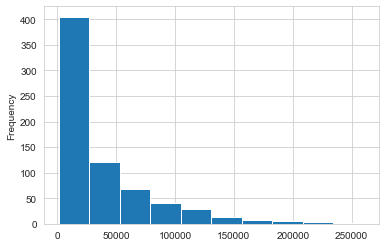

In [433]:
tso_data.groupby('file_id').total_amount.sum().plot(kind='hist')
print(tso_data.groupby('file_id').sum().total_amount.quantile(0.90)) 
#total amount for 90% patients is lower than 96k
print(tso_data.groupby('file_id').sum().total_amount.mean())# average fee 
print(data.groupby('file_id').sum().total_amount.mean())

## analysis based on data

In [515]:
data.shape

(0, 33)

In [513]:
data=data[data.total_amount>0]

In [534]:
insurance=data_all.groupby(by='settlement_date').sum()['insurance_payment']
total=data_all.groupby(by='settlement_date').sum()['total_amount']
print(f'average insurance proportion: {(insurance/total).mean()}')
data_all.groupby(by='settlement_date').sum()[['insurance_payment', 'total_amount']].iplot(theme='pearl',\
 kind='ratio', title='医保基金支付占比', mode='markers')

average insurance proportion: 0.6905265036973789


In [392]:
dataforstackarea=data.groupby('settlement_date').sum().resample('M').sum()

fig = go.Figure()
fig.add_trace(go.Scatter(x=dataforstackarea.index, \
                         y=dataforstackarea.insurance_payment, fill='tozeroy',
                    mode='none' # override default markers+lines
                    ))
fig.add_trace(go.Scatter(x=dataforstackarea.index,\
                         y=dataforstackarea.total_amount, fill='tonexty',
                    mode= 'none',opacity=1))



### settlement_times


In [420]:
# real number of patients
data.groupby('file_id').count().shape

(17566, 32)

In [421]:
# tiny minority went through more than 20 times settlement.
# 
data.groupby('file_id').count().settlement_date.value_counts()

1     14097
2      2131
3       589
4       245
5       111
8        81
6        79
7        68
9        53
11       26
10       23
12       18
16        8
13        8
14        6
15        6
17        5
18        4
20        2
37        1
21        1
30        1
25        1
27        1
33        1
Name: settlement_date, dtype: int64

# tso_data: declare a new frame tso_data,copy from o_data
### trend of total amount

In [323]:
tso_data=o_data

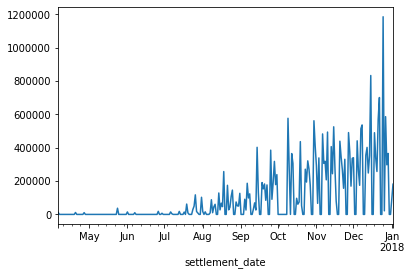

In [324]:
tso_data.groupby('settlement_date').sum().resample('D').sum().total_amount.plot()

In [325]:
tso_data['i_prop']=tso_data.insurance_payment/tso_data.total_amount

In [326]:
tso_data['c_prop']=tso_data.cash_payment/tso_data.total_amount

### correlation between total_amount and insurance proportion

In [ ]:
data

In [342]:
print(tso_data.i_prop.mean())
tso_data.i_prop.iplot(kind='hist') ## insurance-payment proportion

0.649306245954212


In [540]:
data_all['insurance_prop']=data_all.insurance_payment/data_all.total_amount

In [542]:
data_all=data_all[data_all.insurance_prop<=1]

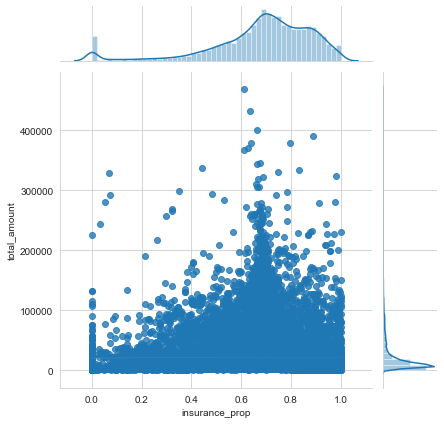

In [543]:
sns.set_style("whitegrid")
sns.jointplot("insurance_prop", "total_amount", \
              data_all.sort_values('total_amount')\
              , kind="reg")

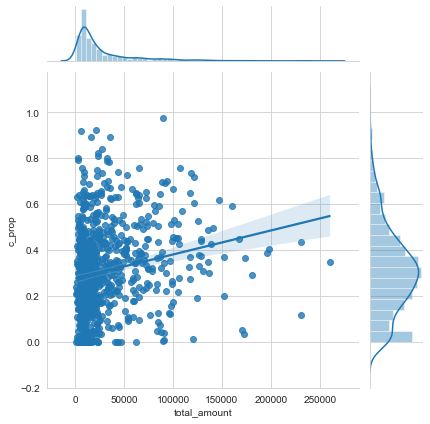

In [405]:
sns.set_style("whitegrid")
sns.jointplot("total_amount", "c_prop", \
              tso_data.sort_values('total_amount')\
              , kind="reg")

In [547]:
np.corrcoef(x=data_all.insurance_prop,y=data_all.total_amount)

array([[1.        , 0.00642288],
       [0.00642288, 1.        ]])

In [548]:
data_all.sort_values('total_amount').iplot(
    x='total_amount',
    y='insurance_prop',
    yaxis_title="基金支付占比",
    xaxis_title="总费用",
    mode='markers',
    bestfit=True,
    bestfit_colors=['blue'])

In [140]:
comb=data.append(o_data)

In [141]:
data.shape

(25381, 33)

In [142]:
comb.shape

(26301, 33)

In [143]:
comb=comb.reset_index(drop=True)

In [144]:
comb=comb.drop('order',axis=1)

In [145]:
comb.shape

(26301, 32)

In [146]:
comb.province.fillna('北京',inplace=True)

In [147]:
comb.province.unique()

array(['北京', '市中心（医照）', '丰台区', '朝阳区', '西城区', '东城区', '海淀区', '平谷区',
       '北京市经济技术开发区', '房山区', '密云县', '石景山区', '怀柔区', '大兴区', '门头沟区', '通州区',
       '昌平区', '顺义区', '天津市', '河北省', '山西省', '新疆维吾尔自治区', '延庆县', '山东省',
       '黑龙江省', '吉林省', '辽宁省', '青海省', '浙江省', '宁夏回族自治区', '河南省', '湖南省', '安徽省',
       '重庆市', '海南省', '福建省', '内蒙古自治区', '甘肃省', '江西省', '陕西省', '新疆生产建设兵团',
       '江苏省', '四川省', '湖北省', '广东省', '广西壮族自治区', '贵州省'], dtype=object)

In [148]:
def exchange1(x):
    if x in ['北京', '市中心（医照）', '丰台区', '朝阳区', '西城区', '东城区', '海淀区', '平谷区',
       '北京市经济技术开发区', '房山区', '密云县', '石景山区', '怀柔区', '大兴区', '门头沟区', '通州区',
       '昌平区', '顺义区', '延庆县']:
        x='北京'
        return x
    else:
        return x
a='河北省'
exchange1(a)

'河北省'

In [149]:
comb.province=comb.province.apply(exchange1)

In [150]:
comb.province.unique()

array(['北京', '天津市', '河北省', '山西省', '新疆维吾尔自治区', '山东省', '黑龙江省', '吉林省', '辽宁省',
       '青海省', '浙江省', '宁夏回族自治区', '河南省', '湖南省', '安徽省', '重庆市', '海南省', '福建省',
       '内蒙古自治区', '甘肃省', '江西省', '陕西省', '新疆生产建设兵团', '江苏省', '四川省', '湖北省',
       '广东省', '广西壮族自治区', '贵州省'], dtype=object)

In [151]:
ids = {'cp':['北京', '天津市', '河北省', '山西省', '新疆维吾尔自治区', '山东省', '黑龙江省', '吉林省', '辽宁省',
       '青海省', '浙江省', '宁夏回族自治区', '河南省', '湖南省', '安徽省', '重庆市', '海南省', '福建省',
       '内蒙古自治区', '甘肃省', '江西省', '陕西省', '新疆生产建设兵团', '江苏省', '四川省', '湖北省',
       '广东省', '广西壮族自治区', '贵州省'],
      'p':['Peking','Tianjin','Hebei','Shanxi','Xinjiang','Shandong','Heilongjiang','Jilin','Liaoning','Qinghai',\
           'Zhejiang','Ningxia','Henan','Hunan','Anhui','Chongqing','Hainan','Fujian','Neimeng','Gansu','Jiangxi','Shanxi',\
           'Jianshebingtuan','Jiangsu','Sichuan','Hubei','Guangdong','Guangxi','Guizhou']}

ids = dict(zip(ids['cp'], ids['p']))
print (ids)

{'北京': 'Peking', '天津市': 'Tianjin', '河北省': 'Hebei', '山西省': 'Shanxi', '新疆维吾尔自治区': 'Xinjiang', '山东省': 'Shandong', '黑龙江省': 'Heilongjiang', '吉林省': 'Jilin', '辽宁省': 'Liaoning', '青海省': 'Qinghai', '浙江省': 'Zhejiang', '宁夏回族自治区': 'Ningxia', '河南省': 'Henan', '湖南省': 'Hunan', '安徽省': 'Anhui', '重庆市': 'Chongqing', '海南省': 'Hainan', '福建省': 'Fujian', '内蒙古自治区': 'Neimeng', '甘肃省': 'Gansu', '江西省': 'Jiangxi', '陕西省': 'Shanxi', '新疆生产建设兵团': 'Jianshebingtuan', '江苏省': 'Jiangsu', '四川省': 'Sichuan', '湖北省': 'Hubei', '广东省': 'Guangdong', '广西壮族自治区': 'Guangxi', '贵州省': 'Guizhou'}


In [152]:
comb['province_e']=comb.province.replace(ids)

In [154]:
comb.province

0         北京
1         北京
2         北京
3         北京
4         北京
        ... 
26296    河北省
26297    山西省
26298    河北省
26299    山西省
26300    山西省
Name: province, Length: 26301, dtype: object

In [155]:
def exchange2(x):
    if x not in ['北京', '市中心（医照）', '丰台区', '朝阳区', '西城区', '东城区', '海淀区', '平谷区',
       '北京市经济技术开发区', '房山区', '密云县', '石景山区', '怀柔区', '大兴区', '门头沟区', '通州区',
       '昌平区', '顺义区', '延庆县']:
        x='异地'
        return x
    else:
        return '北京'
a='河北省'
exchange2(a)

'异地'

In [113]:
a

'河北省'

In [156]:
comb.province=comb.province.apply(exchange2)

In [157]:
print(comb[comb.province=='异地'].settlement_date.min())
print(comb[comb.province=='异地'].settlement_date.max())
print(comb.settlement_date.min())
print(comb.settlement_date.max())

2017-03-01 00:00:00
2018-01-02 00:00:00
2017-01-03 00:00:00
2018-01-02 00:00:00


In [158]:
comb.province.unique()

array(['北京', '异地'], dtype=object)

In [159]:
comb.columns

Index(['settlement_date', 'file_id', 'transaction_serie_number', 'class',
       'insurance_id', 'gender', 'province', 'insuree_type', 'civil_servant',
       'admission_date', 'discharge_date', 'days', 'total_amount',
       'cash_payment', 'personal_account_payment', 'upload',
       'settlement_method', 'insurance_type', 'status', 'emergency',
       'red_label', 'department', 'admission_type', 'discharge_type',
       'diagnosis', 'surgery', 'insurance_payment', 'self_payment', 'self1',
       'self2', 'deductible', 'payment_date', 'province_e'],
      dtype='object')

In [160]:
comb.province_e

0        Peking
1        Peking
2        Peking
3        Peking
4        Peking
          ...  
26296     Hebei
26297    Shanxi
26298     Hebei
26299    Shanxi
26300    Shanxi
Name: province_e, Length: 26301, dtype: object

In [162]:
# delete refund record
comb=comb[comb.total_amount>0]

# set environment for plotly

In [293]:
import plotly.graph_objs as go
import chart_studio.plotly as py

In [294]:
import cufflinks as cf

In [295]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [296]:
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected=True)
cf.go_offline(connected=True)

# Set global theme
cf.set_config_file(world_readable=True, theme='pearl')

In [171]:
#remove unmatched dates
comb=comb[comb.settlement_date>'2017-03-01']

In [493]:
#异地病人结算省分布

comb[comb.province_e!='Peking'].province_e.count()
# comb[comb.province_e!='Peking'].province_e.value_counts().iplot(kind='bar')

1833

In [168]:
comb.total_amount.iplot(
    kind='hist',
    bins=100,
    xTitle='Total Fee',
    linecolor='black',
    yTitle='count',
    title='Total Fee Distribution')

In [ ]:
comb[['cash_payment', 'insurance_payment']].iplot(
    kind='hist',
    linecolor='black',
    bins=50,
    histnorm='percent',
    bargap=0.1,
    opacity=0.8,
    barmode='group',
    xTitle='Time of Day',
    yTitle='(%) of Articles',
    title='Time Started and Time Published')

In [195]:
#北京和外地人次对比
print(comb.groupby(by='province').count().file_id)
print(comb.groupby(by='province').count().file_id[-1]*100/comb.groupby(by='province').count().file_id.sum())
layout1 = cf.Layout(
    height=300,
    width=500)
comb.groupby(by='province').count().file_id.iplot(kind='bar',layout=layout1)

province
北京    20626
异地     1833
Name: file_id, dtype: int64
8.161538804042923


In [257]:
comb[comb.settlement_date=='2017-04-06']
# & comb.province=='异地']
# comb.province=='异地'

settlement_date file_id transaction_serie_number class  insurance_id  \
3730       2017-04-06  121802     0111000520000261767Y    住院  11438534900S   
3731       2017-04-06  426918     0111000520000261031Y    住院     N0148127X   
3732       2017-04-06  320842     0111000520000260194Y    住院  10027752501S   
3733       2017-04-06  296637     0111000520000260188Y    住院  10124956900S   
3734       2017-04-06  491434     0111000520000260219Y    住院  10183711900S   
...               ...     ...                      ...   ...           ...   
3830       2017-04-06  272872     0111000520000261318Y    住院  10029989100S   
3831       2017-04-06  498906     0111000520000261511Y    住院  11140336601S   
3832       2017-04-06  470721     0111000520000260499Y    住院  122649354010   
3833       2017-04-06  369208     0111000520000261324Y    住院  102871428019   
22458      2017-04-06  426918     0111000520000261031Y    住院     N0148127X   

      gender province insuree_type civil_servant admission_date  ...  \
3730       女       北京           离休           不享受     2017-03-15  ...   
3731       男       异地           退休           NaN     2017-03-21  ...   
3732       男       北京           退休           不享受     2017-03-22  ...   
3733       男       北京           退休           不享受     2017-03-22  ...   
3734       女       北京           退休           不享受     2017-03-22  ...   
...      ...      ...          ...           ...            ...  ...   
3830       女       北京           退休           不享受     2017-04-01  ...   
3831       女       北京           在职           不享受     2017-04-04  ...   
3832       女       北京          NaN           NaN     2017-03-24  ...   
3833       女       北京          NaN           NaN     2017-04-01  ...   
22458      男       异地           退休           NaN     2017-03-21  ...   

      insurance_payment  self_payment    self1     self2  deductible  \
3730          190459.79       8537.96     0.00      0.00         0.0   
3731           10203.23          0.00     0.00    267.60       800.0   
3732           75682.67       3379.99  3478.92  28190.53      1300.0   
3733           89983.91        719.00  3696.71  32550.73      1300.0   
3734           26545.16       3055.87  2550.82  56369.21      1300.0   
...                 ...           ...      ...       ...         ...   
3830               0.00          0.00   149.00      0.00       149.0   
3831             286.14          6.93   700.49      0.00       650.0   
3832               0.00      32086.19     0.00      0.00         0.0   
3833               0.00        150.50     0.00      0.00         0.0   
22458          10203.23          0.00     0.00    267.60       800.0   

      payment_date province_e date month day_of_week  
3730    2017-04-27     Peking    6     4           4  
3731    2017-04-26     Shanxi    6     4           4  
3732    2017-04-27     Peking    6     4           4  
3733    2017-04-27     Peking    6     4           4  
3734    2017-04-27     Peking    6     4           4  
...            ...        ...  ...   ...         ...  
3830    2017-04-27     Peking    6     4           4  
3831    2017-04-27     Peking    6     4           4  
3832           NaN     Peking    6     4           4  
3833           NaN     Peking    6     4           4  
22458   2017-04-26     Shanxi    6     4           4  

[105 rows x 36 columns]

(1833, 36)
38004.0659494585
28715.56537915986


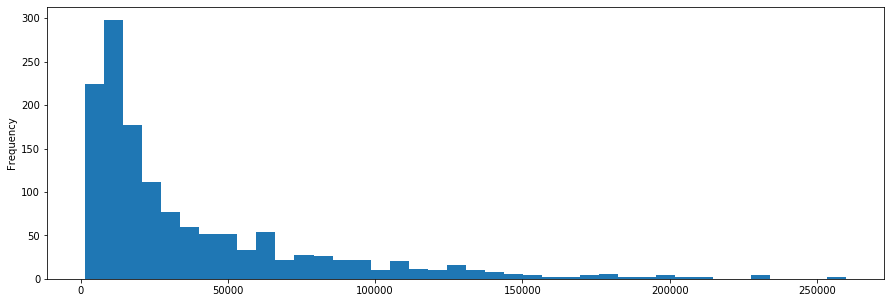

In [237]:
print(comb[comb.province=='异地'].shape)#total different place settle patients number

print(comb[comb.province=='异地'].groupby('file_id').sum().total_amount.mean())# mean total fee for each patient
print(comb[comb.province=='异地'].total_amount.mean())# mean total fee for each settlement
comb[comb.province=='异地'].groupby('file_id').sum().total_amount.plot(kind='hist',bins=40,figsize=(15,5))
#distribution of total fee for each patient

In [ ]:
comb.

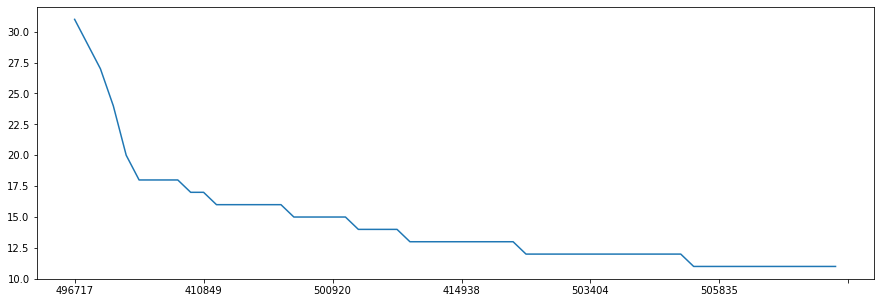

In [221]:
comb.file_id.value_counts()[:60].plot(figsize=(15,5))

In [223]:
comb[comb.file_id=='496717']

settlement_date file_id transaction_serie_number class  insurance_id  \
278        2017-03-28  496717     0111000520000260367Y    住院  10131032700S   
1518       2017-03-10  496717     0111000520000258350Y    住院  10131032700S   
2019       2017-03-03  496717     0111000520000255859Y    住院  10131032700S   
3033       2017-04-17  496717     0111000520000262565Y    住院  10131032700S   
4001       2017-04-01  496717     0111000520000261142Y    住院  10131032700S   
4585       2017-05-23  496717     0111000520000266701Y    住院  10131032700S   
5044       2017-05-15  496717     0111000520000265941Y    住院  10131032700S   
5652       2017-05-05  496717     0111000520000264926Y    住院  10131032700S   
6032       2017-05-02  496717     0111000520000263393Y    住院  10131032700S   
6676       2017-06-22  496717     0111000520000270107Y    住院  10131032700S   
7253       2017-06-14  496717     0111000520000269305Y    住院  10131032700S   
7891       2017-06-06  496717     0111000520000268126Y    住院  10131032700S   
9019       2017-07-19  496717     0111000520000273307Y    住院  10131032700S   
9417       2017-07-12  496717     0111000520000272492Y    住院  10131032700S   
9949       2017-07-05  496717     0111000520000271684Y    住院  10131032700S   
10283      2017-08-30  496717     0111000520000278044Y    住院  10131032700S   
11235      2017-08-16  496717     0111000520000276380Y    住院  10131032700S   
11625      2017-08-09  496717     0111000520000275609Y    住院  10131032700S   
12111      2017-08-02  496717     0111000520000274797Y    住院  10131032700S   
12433      2017-09-29  496717     0111000520000281806Y    住院  10131032700S   
13750      2017-09-13  496717     0111000520000279835Y    住院  10131032700S   
14303      2017-09-06  496717     0111000520000278868Y    住院  10131032700S   
14678      2017-10-31  496717     0111000520000285875Y    住院  10131032700S   
15668      2017-10-18  496717     0111000520000283917Y    住院  10131032700S   
16281      2017-10-10  496717     0111000520000282683Y    住院  10131032700S   
16725      2017-11-28  496717     0111000520000289889Y    住院  10131032700S   
17886      2017-11-14  496717     0111000520000287840Y    住院  10131032700S   
18438      2017-11-07  496717     0111000520000286785Y    住院  10131032700S   
19033      2017-12-29  496717     0111000520000294179Y    住院  10131032700S   
20685      2017-12-11  496717     0111000520000291883Y    住院  10131032700S   
21188      2017-12-05  496717     0111000520000290888Y    住院  10131032700S   

      gender province insuree_type civil_servant admission_date  ...  \
278        女       北京           退休           不享受     2017-03-23  ...   
1518       女       北京           退休           不享受     2017-03-07  ...   
2019       女       北京           退休           不享受     2017-02-14  ...   
3033       女       北京           退休           不享受     2017-04-12  ...   
4001       女       北京           退休           不享受     2017-03-30  ...   
4585       女       北京           退休           不享受     2017-05-18  ...   
5044       女       北京           退休           不享受     2017-05-11  ...   
5652       女       北京           退休           不享受     2017-05-03  ...   
6032       女       北京           退休           不享受     2017-04-19  ...   
6676       女       北京           退休           不享受     2017-06-19  ...   
7253       女       北京           退休           不享受     2017-06-12  ...   
7891       女       北京           退休           不享受     2017-06-01  ...   
9019       女       北京           退休           不享受     2017-07-17  ...   
9417       女       北京           退休           不享受     2017-07-10  ...   
9949       女       北京           退休           不享受     2017-07-03  ...   
10283      女       北京           退休           不享受     2017-08-28  ...   
11235      女       北京           退休           不享受     2017-08-14  ...   
11625      女       北京           退休           不享受     2017-08-07  ...   
12111      女       北京           退休           不享受     2017-07-31  ...   
12433      女       北京           退休           不享受     2017-09-25  ... 

In [208]:
comb.duplicated().sum()

0

In [198]:
comb[comb.file_id.duplicated() & comb.settlement_date.duplicated()]

settlement_date file_id transaction_serie_number class  insurance_id  \
84         2017-03-31  500374     0111000520000258871Y    住院  11531917800S   
238        2017-03-29  504977     0111000520000259653Y    住院  10281353700S   
468        2017-03-27  390647     0111000520000260182Y    住院  10406210800S   
486        2017-03-24  498478     0111000520000260381Y    住院  10707184800S   
571        2017-03-23  504279     0111000520000257234Y    住院  10867065700S   
...               ...     ...                      ...   ...           ...   
22448      2017-07-13  508988     0111000520000272481Y    住院     B60482727   
22451      2017-06-29  449137     0111000520000270595Y    住院     B01213999   
22452      2017-06-26  461291     0111000520000269304Y    住院     Z00178828   
22453      2017-06-07  449137     0111000520000267205Y    住院     B01213999   
22455      2017-05-24  310950     0111000520000264448Y    住院     N00370228   

      gender province  insuree_type civil_servant admission_date  ...  \
84         男       北京  离休的副部级医疗照顾人员           不享受     2017-03-07  ...   
238        男       北京            退休           不享受     2017-03-17  ...   
468        男       北京            退休           不享受     2017-03-22  ...   
486        女       北京            在职           不享受     2017-03-21  ...   
571        女       北京            在职           不享受     2017-02-26  ...   
...      ...      ...           ...           ...            ...  ...   
22448      男       异地            退休           NaN     2017-07-10  ...   
22451      女       异地            退休           NaN     2017-06-22  ...   
22452      男       异地            退休           NaN     2017-06-12  ...   
22453      女       异地            在职           NaN     2017-05-23  ...   
22455      男       异地            退休           NaN     2017-04-28  ...   

      insurance_payment  self_payment    self1    self2  deductible  \
84             25135.36       8057.90     0.00     0.00        0.00   
238             3563.00         36.00  1112.00  1336.50        0.00   
468              796.05          9.00    37.51     7.46        0.00   
486                0.00         54.93   784.18     7.20      784.18   
571             3522.15       1050.93  1921.55    45.53     1300.00   
...                 ...           ...      ...      ...         ...   
22448           9258.80       3348.00     0.00  2294.08      600.00   
22451           4907.16        975.80     0.00   261.25        0.00   
22452          16420.63        154.55     0.00   547.41      480.00   
22453           6580.17       1038.80     0.00   350.66     1200.00   
22455          27904.17       2924.13     0.00  3034.92      400.00   

      payment_date province_e date month day_of_week  
84      2017-06-13     Peking   31     3           5  
238     2017-04-27     Peking   29     3           3  
468     2017-04-06     Peking   27     3           1  
486     2017-04-06     Peking   24     3           5  
571     2017-04-06     Peking   23     3           4  
...            ...        ...  ...   ...         ...  
22448   2017-08-01      Hebei   13     7           4  
22451   2017-08-01   Xinjiang   29     6           4  
22452   2017-07-06      Hebei   26     6           1  
22453   2017-07-06   Xinjiang    7     6           3  
22455   2017-07-06     Shanxi   24     5           3  

[6561 rows x 36 columns]

In [ ]:
comb.pivot(values='insurance_payment',columns='province').iplot(
    kind='hist',
    bins=30,
    linecolor='black',
    opacity=0.4,
    histnorm='percent',
    barmode='overlay',
    xTitle='Time of day',
    yTitle='(%) of articles',
    title='Time Started and Time Published Overlaid')

In [169]:
comb.pivot(values='insurance_payment',columns='province').iplot(
        kind='box',
        layout=dict(
            height=600,
            yaxis=dict(title='fans'),
            title='Fans by Publication',
            margin=dict(b=140)))

In [170]:
#remove outliers
comb=comb[comb['total_amount']<comb['total_amount'].quantile(0.999)]

In [172]:
combts=comb.set_index('settlement_date')

In [173]:
combts['date']=combts.index.day

In [176]:
combts['month']=combts.index.month

In [177]:
combts['day_of_week']=combts.index.dayofweek+1

In [179]:
combts.head()

file_id transaction_serie_number class  insurance_id gender  \
settlement_date                                                               
2017-03-31       500374     0111000520000261167Y    住院  11531917800S      男   
2017-03-31       496716     0111000520000261245Y    住院  11515900501S      女   
2017-03-31       216092     0111000520000260749Y    住院  10099572400S      女   
2017-03-31       451677     0111000520000260751Y    住院  10252621800S      女   
2017-03-31       506112     0111000520000260773Y    住院  10180978400S      女   

                province  insuree_type civil_servant admission_date  \
settlement_date                                                       
2017-03-31            北京  离休的副部级医疗照顾人员           不享受     2017-03-07   
2017-03-31            北京            在职           不享受     2017-03-25   
2017-03-31            北京            退休           不享受     2017-03-28   
2017-03-31            北京            退休           不享受     2017-03-28   
2017-03-31            北京            退休           不享受     2017-03-28   

                discharge_date  ...  insurance_payment  self_payment    self1  \
settlement_date                 ...                                             
2017-03-31          2017-03-30  ...           32035.36       1157.90     0.00   
2017-03-31          2017-03-30  ...            3000.00        134.93     0.00   
2017-03-31          2017-03-30  ...            3563.00         18.00  1112.00   
2017-03-31          2017-03-30  ...            3563.00         18.00  1112.00   
2017-03-31          2017-03-29  ...             251.13         35.73  1311.83   

                   self2 deductible payment_date province_e date month  \
settlement_date                                                          
2017-03-31          0.00        0.0   2017-06-13     Peking   31     3   
2017-03-31          0.00        0.0   2017-05-17     Peking   31     3   
2017-03-31       1336.50        0.0   2017-04-27     Peking   31     3   
2017-03-31       1336.50        0.0   2017-04-27     Peking   31     3   
2017-03-31         16.62     1300.0   2017-04-27     Peking   31     3   

                day_of_week  
settlement_date              
2017-03-31                5  
2017-03-31                5  
2017-03-31                5  
2017-03-31                5  
2017-03-31                5  

[5 rows x 35 columns]

In [183]:
# get back to non timeseries format
comb=combts.reset_index()

In [187]:
comb.shape

(22459, 36)

In [188]:
combts.shape

(22459, 35)